# Mediapipe

## Installation

In [1]:
%pip install mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2 #import open cv
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose #on prend ici le pose estimation model

## Détection

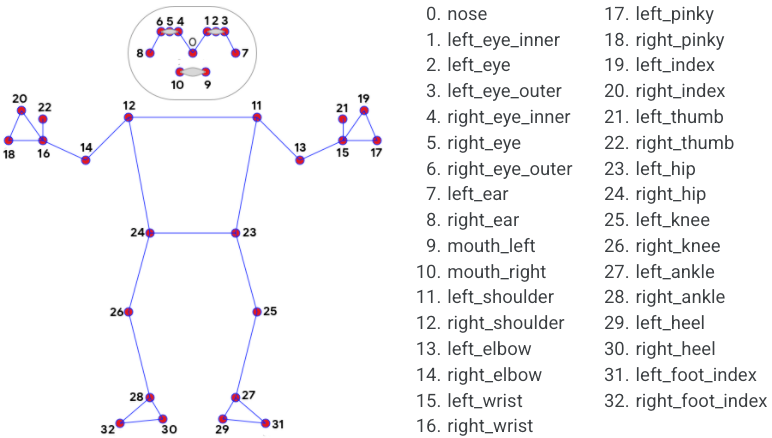

In [2]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks) #affiche landmarks
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.5269143581390381
y: 0.6609184741973877
z: -0.5826777815818787
visibility: 0.9996204376220703
, x: 0.5586338043212891
y: 0.6211684346199036
z: -0.5662106275558472
visibility: 0.9989590644836426
, x: 0.5718347430229187
y: 0.6231041550636292
z: -0.5659059286117554
visibility: 0.9992141723632812
, x: 0.5837030410766602
y: 0.6252401471138
z: -0.5661288499832153
visibility: 0.9988922476768494
, x: 0.5220386385917664
y: 0.6148768067359924
z: -0.5531780123710632
visibility: 0.9991704225540161
, x: 0.5115615129470825
y: 0.6113383769989014
z: -0.5524351000785828
visibility: 0.9994117021560669
, x: 0.5021544098854065
y: 0.6077061295509338
z: -0.5527442097663879
visibility: 0.9993149042129517
, x: 0.6096736788749695
y: 0.6416752934455872
z: -0.3593391478061676
visibility: 0.998889148235321
, x: 0.5016376376152039
y: 0.6168725490570068
z: -0.28992706537246704
visibility: 0.9995716214179993
, x: 0.5495103597640991
y: 0.7124772667884827
z: -0.49898800253868103
visibility: 0.9994639754295349
, x

In [5]:
len(landmarks)

33

In [6]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [13]:
landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].visibility

0.055493466556072235

In [8]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.7811204791069031
y: 0.7279407978057861
z: -0.5352923274040222
visibility: 0.997178852558136

In [9]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.7880876064300537
y: 1.0163336992263794
z: -0.5155529379844666
visibility: 0.9899040460586548

In [10]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [11]:
shoulder, elbow, wrist

([0.7231913805007935, 0.4249396026134491],
 [0.7811204791069031, 0.7279407978057861],
 [0.7880876064300537, 1.0163336992263794])